**Fahion_MNIST Dataset**

In [7]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model   

In [8]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [10]:
#convolution expects 3D input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [13]:
# to get unique elements 
K = len(set(y_train))
print("number of classes", K)

number of classes 10


In [15]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [16]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics =['accuracy'])

r = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs =15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7394 - loss: 0.7041 - val_accuracy: 0.8449 - val_loss: 0.4093
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8552 - loss: 0.3842 - val_accuracy: 0.8718 - val_loss: 0.3443
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8783 - loss: 0.3188 - val_accuracy: 0.8768 - val_loss: 0.3292
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8941 - loss: 0.2853 - val_accuracy: 0.8878 - val_loss: 0.3007
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9026 - loss: 0.2592 - val_accuracy: 0.8924 - val_loss: 0.2947
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9124 - loss: 0.2338 - val_accuracy: 0.8839 - val_loss: 0.3305
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9194 - loss: 0.2126 - val_accuracy: 0.8944 - val_loss: 0.2927
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9240 - loss: 

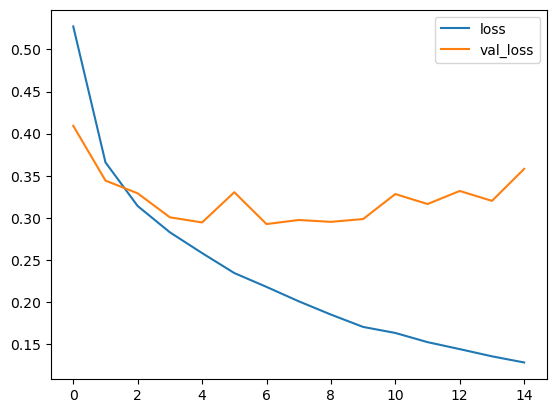

In [17]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

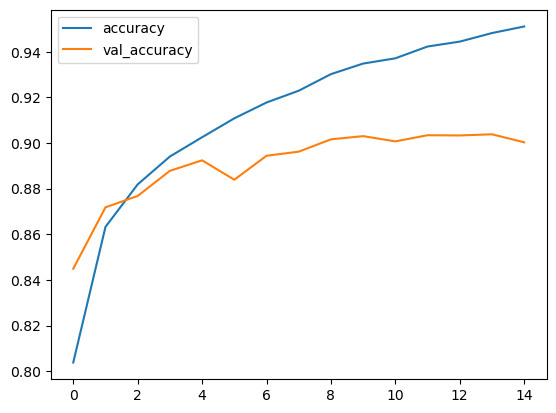

In [18]:
plt.plot(r.history['accuracy'], label ='accuracy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[868   1  25  12   3   2  82   0   7   0]
 [  4 973   0  15   3   0   2   0   3   0]
 [ 16   0 889  11  28   0  54   0   2   0]
 [ 16   8  22 899  28   2  25   0   0   0]
 [  1   0  75  26 800   0  95   0   3   0]
 [  0   0   0   1   0 970   0  19   2   8]
 [109   0  84  28  64   0 700   0  15   0]
 [  0   0   0   0   0  11   0 964   0  25]
 [  3   1   5   1   5   1   1   3 979   1]
 [  1   0   0   0   0   6   0  32   0 961]]


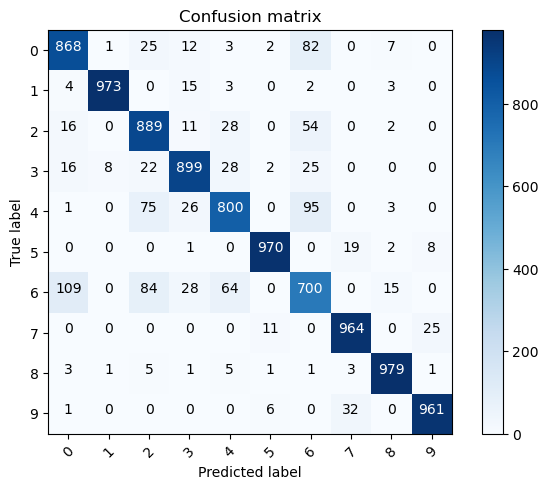

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming model, x_test, and y_test are defined
p_test2 = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test2)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


In [22]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



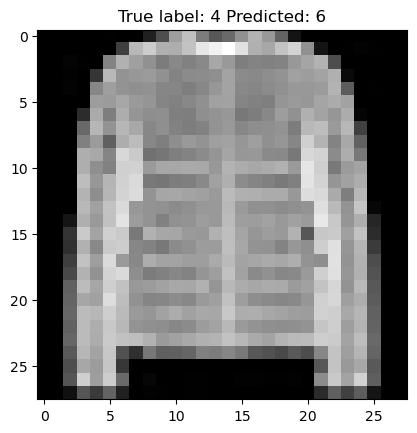

In [23]:
import numpy as np
misclassified_idx = np.where(p_test2!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test2[i]));

**CIFAR-10 Dataset**

In [27]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [28]:
# to get unique elements 
K = len(set(y_train))
print("number of classes", K)

number of classes 10


In [29]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [30]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics =['accuracy'])

r = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs =15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3441 - loss: 1.7693 - val_accuracy: 0.5160 - val_loss: 1.3206
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5308 - loss: 1.2989 - val_accuracy: 0.5952 - val_loss: 1.1624
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5903 - loss: 1.1446 - val_accuracy: 0.6262 - val_loss: 1.0630
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6260 - loss: 1.0558 - val_accuracy: 0.6269 - val_loss: 1.0447
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6544 - loss: 0.9769 - val_accuracy: 0.6577 - val_loss: 0.9726
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6753 - loss: 0.9148 - val_accuracy: 0.6788 - val_loss: 0.9259
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6916 - loss: 0.8567 - val_accuracy: 0.6613 - val_loss: 0.9720
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7096 - loss: 0.8149 - 

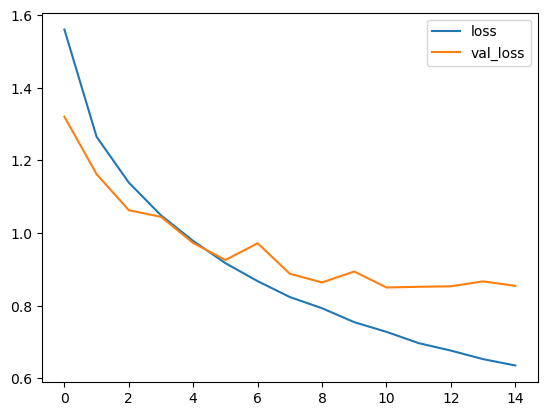

In [31]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

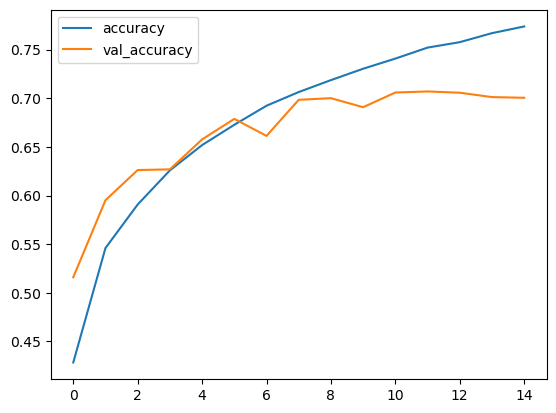

In [32]:
plt.plot(r.history['accuracy'], label ='accuracy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[747  15  53  21  31  11   9  16  59  38]
 [ 21 768   8  14   8   6  22   7  29 117]
 [ 63   1 587  75 119  70  44  29   8   4]
 [ 17   4  51 496  98 229  46  32   6  21]
 [ 17   2  69  57 727  48  28  47   4   1]
 [  9   3  46 167  71 625  21  46   7   5]
 [  4   4  44  80  67  50 734   6   5   6]
 [  8   1  23  41  94  63   6 747   3  14]
 [ 69  30  20  11  23   9   6  11 800  21]
 [ 28  64  13  25  10  10  11  30  35 774]]


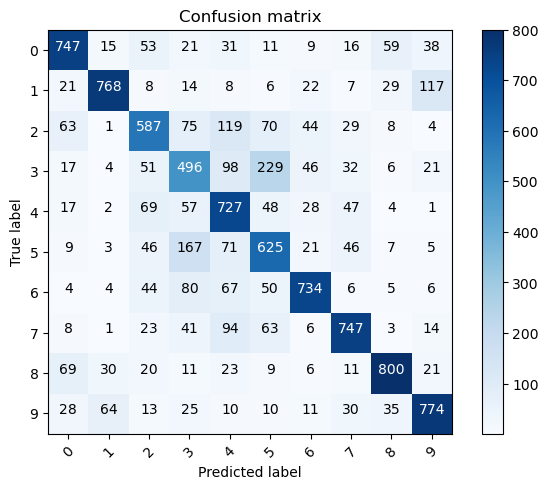

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming model, x_test, and y_test are defined
p_test3 = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test3)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


In [34]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

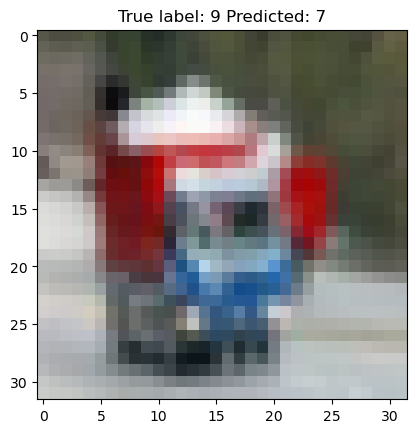

In [35]:
import numpy as np
misclassified_idx = np.where(p_test2!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test2[i]));

**Pseudocode for data augmentation**


from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

Other args: rotation_range, width_shift_range, height_shift_range, brightness_range, shear_range, zoom_range, horizontal_flip, and vertical_flip

data_generator = ImageDataGenerator(...)

train_generator = data_generator.flow(
    x_train, y_train, batch_size
)


steps_per_epoch = x_train.shape[0] // batch_size

loops through generator
fit generator returns history
r = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50
)

**Imporoved CIFAR-10**

In [36]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

In [37]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1025, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [38]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics =['accuracy'])

r = model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs =50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.4560 - loss: 1.7511 - val_accuracy: 0.6537 - val_loss: 1.0096
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6944 - loss: 0.8742 - val_accuracy: 0.7262 - val_loss: 0.8033
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7598 - loss: 0.6915 - val_accuracy: 0.7599 - val_loss: 0.6986
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.8004 - loss: 0.5822 - val_accuracy: 0.7636 - val_loss: 0.7344
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.8322 - loss: 0.4902 - val_accuracy: 0.7979 - val_loss: 0.6033
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.8592 - loss: 0.4071 - val_accuracy: 0.7988 - val_loss: 0.6236
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.8863 - loss: 0.3347 - val_accuracy: 0.7866 - val_loss: 0.7023
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.9048 -

In [41]:
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size  

model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


C:\Users\nihal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8072 - loss: 0.6429 - val_accuracy: 0.8392 - val_loss: 0.5022
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9062 - loss: 0.2311

C:\Users\nihal\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.2311 - val_accuracy: 0.8394 - val_loss: 0.5010
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8527 - loss: 0.4432 - val_accuracy: 0.8203 - val_loss: 0.5731
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.3724 - val_accuracy: 0.8183 - val_loss: 0.5809
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.8654 - loss: 0.4047 - val_accuracy: 0.8293 - val_loss: 0.5162
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9688 - loss: 0.2272 - val_accuracy: 0.8295 - val_loss: 0.5154
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.8718 - loss: 0.3896 - val_accuracy: 0.8511 - val_loss: 0.4542
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9688 - loss: 0.2086 - val_accuracy: 0.8518 - val_loss: 0.4542
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8742 - loss: 0.3756 - val

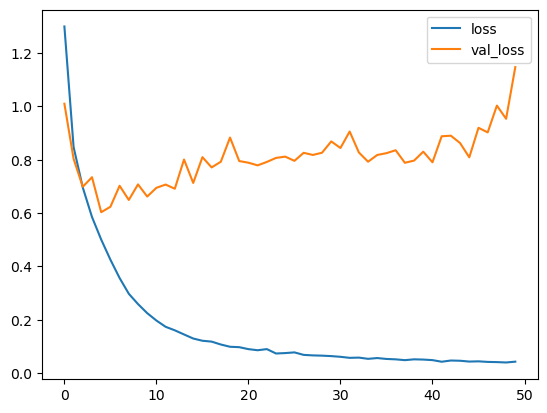

In [42]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

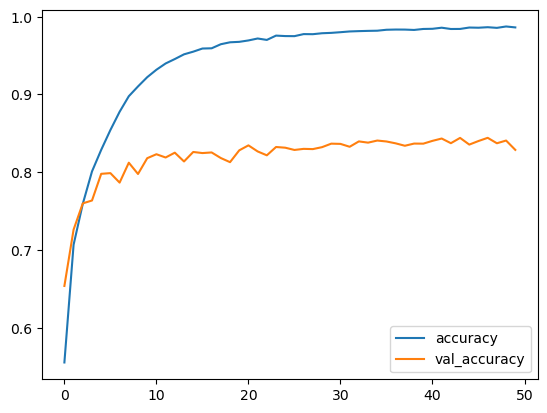

In [43]:
plt.plot(r.history['accuracy'], label ='accuracy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Confusion matrix, without normalization
[[861  19  23   8   9   1  12   7  16  44]
 [  3 959   0   0   1   0   1   0   1  35]
 [ 30   3 772  27  38  28  75  18   1   8]
 [ 12   4  28 701  29 107  81  18   3  17]
 [  4   2  18  23 842  24  52  32   1   2]
 [  4   2  15  84  26 815  30  20   0   4]
 [  3   2   7  16  10   3 954   2   0   3]
 [  2   0   6  14  12  19  10 926   1  10]
 [ 23  34   3   6   4   3   6   4 888  29]
 [  3  33   1   1   0   1   5   2   3 951]]


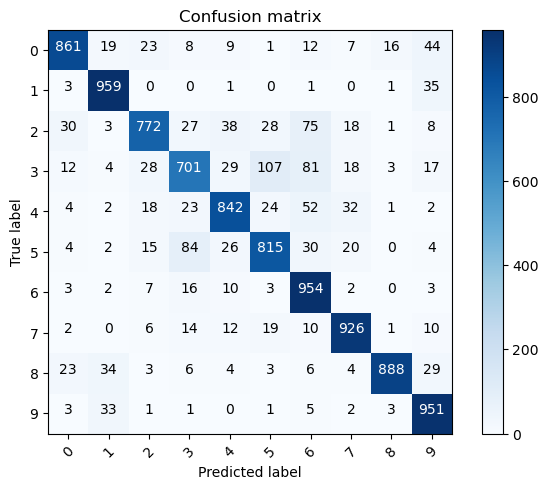

In [44]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming model, x_test, and y_test are defined
p_test4 = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test4)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


In [45]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

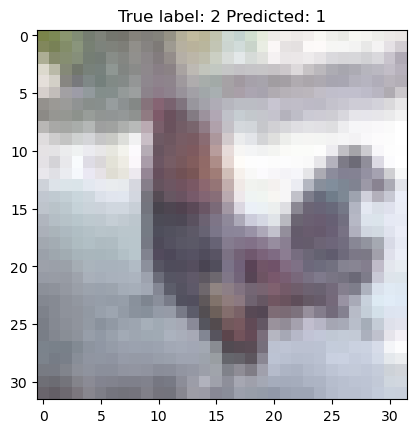

In [46]:
import numpy as np
misclassified_idx = np.where(p_test2!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test2[i]));

In [47]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,196,065 (27.45 MB)

 Trainable params: 2,398,389 (9.15 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,796,780 (18.30 MB)